# iris 데이터 주성분 분석 후 분류하기

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [2]:
import numpy as np
cov_mat = np.cov(X.T)

In [3]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues : %s' % eigen_vals)

Eigenvalues : [4.22824171 0.24267075 0.0782095  0.02383509]


In [4]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print(var_exp)

[0.924618723201727, 0.05306648311706786, 0.017102609807929672, 0.005212183873275362]


In [5]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.92461872 0.97768521 0.99478782 1.        ]


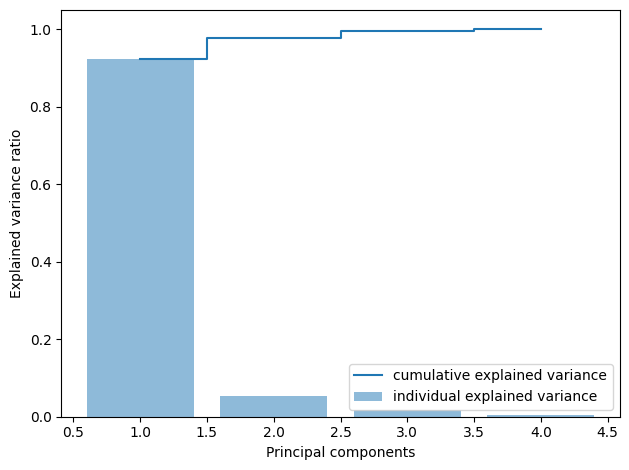

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', 
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [7]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.228241706034867,
  array([ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ])),
 (0.24267074792863375,
  array([-0.65658877, -0.73016143,  0.17337266,  0.07548102])),
 (0.07820950004291903,
  array([-0.58202985,  0.59791083,  0.07623608,  0.54583143])),
 (0.0238350929734494,
  array([ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]))]

In [8]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


In [9]:
X_pca = X @ w
print(X_pca[:5,:])

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]]


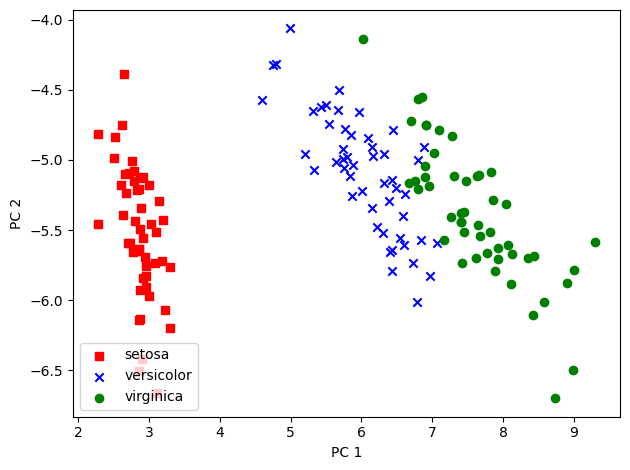

In [10]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)  

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [13]:
print(mlp.score(X_train, y_train))

0.9714285714285714


In [14]:
pred = mlp.predict(X_test)
print(pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']


In [15]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, pred, margins=True,
                               rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,17,1,18
virginica,0,0,11,11
All,16,17,12,45


In [16]:
print(mlp.score(X_test, y_test))

0.9777777777777777


# 특잇값 분해

In [17]:
x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]

In [18]:
import numpy as np
A = np.c_[x, [1]*8]  # column_stack((x, np.ones((8))))
B = np.array(y)

In [19]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
U

array([[-0.09523708, -0.75291219, -0.30570949, -0.28090959, -0.27189145,
        -0.25160063, -0.24258249, -0.23581888],
       [-0.19045071, -0.49902645, -0.10192726,  0.12193311,  0.20333687,
         0.38649535,  0.46789912,  0.52895194],
       [-0.28566433, -0.24514071,  0.91852536, -0.0671799 , -0.06198182,
        -0.05028612, -0.04508804, -0.04118947],
       [-0.3511237 , -0.07059426, -0.09192115,  0.8886239 , -0.11845062,
        -0.13436831, -0.14144283, -0.14674873],
       [-0.37492711, -0.00712283, -0.09571988, -0.12744744,  0.86101527,
        -0.16494364, -0.17648094, -0.18513391],
       [-0.42848478,  0.1356879 , -0.10426703, -0.16360796, -0.18518648,
         0.76626184, -0.25531668, -0.27150057],
       [-0.45228818,  0.19915934, -0.10806576, -0.1796793 , -0.20572059,
        -0.26431349,  0.70964522, -0.30988575],
       [-0.47014074,  0.24676291, -0.1109148 , -0.19173281, -0.22112118,
        -0.287245  , -0.31663336,  0.66132536]])

In [20]:
s

array([336.0759044 ,   0.99321713])

In [21]:
VT

array([[-0.99996895, -0.00788011],
       [ 0.00788011, -0.99996895]])

In [22]:
S = np.zeros((1,1))
S[0][0] = s[0]

A2 = U[:,0:1] @ S @ VT[0:1,:]

In [23]:
A2

array([[ 32.00589279,   0.25221793],
       [ 64.00390571,   0.50437377],
       [ 96.00191863,   0.75652961],
       [118.00055252,   0.92988675],
       [126.00005575,   0.9929257 ],
       [143.99893802,   1.13476336],
       [151.99844125,   1.19780232],
       [157.99806867,   1.24508154]])

In [24]:
A

array([[ 32,   1],
       [ 64,   1],
       [ 96,   1],
       [118,   1],
       [126,   1],
       [144,   1],
       [152,   1],
       [158,   1]])

In [25]:
weight, bias = np.linalg.inv(A.T @ A) @ A.T @ B
weight, bias

(0.8744839346616398, -26.72383773110744)

In [26]:
A2[:,1] = 1
weight2, bias2 = np.linalg.inv(A2.T @ A2) @ A2.T @ B
weight2, bias2

(0.8745382401681373, -26.730728978672136)

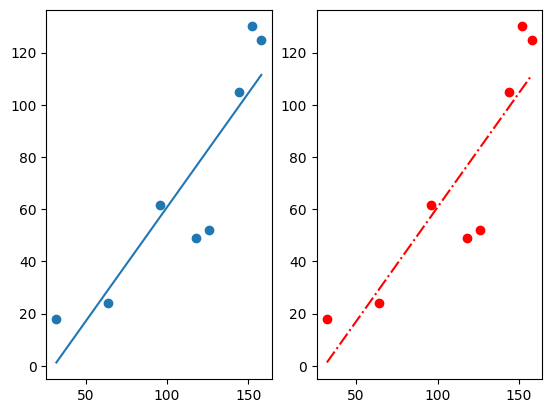

In [27]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x, y)
ax[0].plot(A[:,0], weight*A[:,0] + bias, '-')
ax[1].scatter(A2[:,0], y, color="red")
ax[1].plot(A2[:,0], weight2*A2[:,0] + bias2, '-.', color="red")
plt.show()

In [28]:
Uw, Uv = np.linalg.eig(A @ A.T)
Uv

array([[-9.52370763e-02+0.00000000e+00j,  7.52912191e-01+0.00000000e+00j,
        -2.64516028e-01+0.00000000e+00j,  2.87999737e-02+0.00000000e+00j,
        -8.35593725e-05+1.08806531e-05j, -8.35593725e-05-1.08806531e-05j,
        -1.64119000e-05+0.00000000e+00j, -1.51582097e-05+0.00000000e+00j],
       [-1.90450705e-01+0.00000000e+00j,  4.99026450e-01+0.00000000e+00j,
         2.39413365e-01+0.00000000e+00j,  2.22024149e-01+0.00000000e+00j,
         8.76046736e-06-1.04960521e-06j,  8.76046736e-06+1.04960521e-06j,
        -6.58943113e-06+0.00000000e+00j, -1.23735062e-06+0.00000000e+00j],
       [-2.85664334e-01+0.00000000e+00j,  2.45140710e-01+0.00000000e+00j,
        -1.08931716e-01+0.00000000e+00j, -3.07194092e-02+0.00000000e+00j,
        -6.96019973e-02+1.35688525e-01j, -6.96019973e-02-1.35688525e-01j,
        -3.75352350e-01+0.00000000e+00j,  1.14379674e-01+0.00000000e+00j],
       [-3.51123704e-01+0.00000000e+00j,  7.05942631e-02+0.00000000e+00j,
         6.18914993e-01+0.00000000e

In [29]:
Vw, Vv = np.linalg.eig(A.T @ A)
Vv

array([[ 0.99996895, -0.00788011],
       [ 0.00788011,  0.99996895]])

In [30]:
s = np.sqrt(Vw)
s

array([336.0759044 ,   0.99321713])

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [32]:
U, s, VT = np.linalg.svd(iris.data)
U

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [33]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [34]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [35]:
N = 3
S = np.zeros((3,3))
for i in range(N):
    S[i][i] = s[i]

In [36]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [37]:
iris2 = U[:,0:3] @ S @ VT[0:3,:]
iris_df = pd.DataFrame(data=np.c_[iris2, iris.target], 
                       columns=['A', 'B', 'C', 'D', 'Species'])
iris_df.head()

,A,B,C,D,Species
0,5.099009,3.500980,1.401484,0.197678,0.0
1,4.868704,3.030949,1.446898,0.126653,0.0
2,4.694221,3.205715,1.308660,0.186456,0.0
3,4.625181,3.075098,1.462266,0.259016,0.0
4,5.019480,3.580736,1.370809,0.245653,0.0


In [38]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    iris_df.iloc[:,:-1], iris_df.iloc[:,-1], 
    test_size=0.3, random_state=1)

In [39]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000)
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [40]:
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred, 
                               rownames=['True'], colnames=['Pred'], 
                               margins=True)
confusion_matrix

Pred,0.0,1.0,2.0,All
True,,,,
0.0,14,0,0,14
1.0,0,17,1,18
2.0,0,0,13,13
All,14,17,14,45


In [41]:
mlp.score(test_x, test_y)

0.9777777777777777

In [42]:
from sklearn import datasets
from sklearn.utils.extmath import randomized_svd
import numpy as np
import pandas as pd

iris = datasets.load_iris()

U, s, VT = randomized_svd(iris['data'], n_components=3, 
                          n_iter=5, random_state=None)

In [43]:
U

array([[ 6.16168450e-02,  1.29611444e-01, -2.13859674e-03],
       [ 5.80709402e-02,  1.11019776e-01, -7.06723871e-02],
       [ 5.67630474e-02,  1.17966465e-01, -4.34254909e-03],
       [ 5.66534426e-02,  1.05308145e-01, -5.92467197e-03],
       [ 6.12302023e-02,  1.31089790e-01,  3.18810953e-02],
       [ 6.75031684e-02,  1.30884835e-01,  6.85371918e-02],
       [ 5.74820774e-02,  1.16598182e-01,  6.64136685e-02],
       [ 6.09726328e-02,  1.20943120e-01, -5.43026565e-03],
       [ 5.37611959e-02,  9.99414853e-02, -1.76366479e-02],
       [ 5.88266594e-02,  1.12043088e-01, -6.49689136e-02],
       [ 6.52918230e-02,  1.36578094e-01, -4.93585934e-03],
       [ 5.99417779e-02,  1.13753142e-01,  2.52977575e-02],
       [ 5.71132323e-02,  1.11354756e-01, -7.16796746e-02],
       [ 5.15957540e-02,  1.15324791e-01, -4.26212003e-03],
       [ 6.80071908e-02,  1.64183057e-01, -9.57009112e-03],
       [ 7.07625894e-02,  1.59056485e-01,  1.19142652e-01],
       [ 6.53647385e-02,  1.46844820e-01

In [44]:
s

array([95.95991387, 17.76103366,  3.46093093])

In [45]:
VT

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [-0.50215472,  0.67524332,  0.05916621,  0.53701625]])

In [46]:
S = np.zeros((3,3))
for i in range(3):
    S[i][i] = s[i]

In [47]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [48]:
iris2 = U[:,0:3] @ S @ VT[0:3,:]

In [49]:
columns = ['A', 'B', 'C', 'D', 'Species']

iris_df = pd.DataFrame(data=np.c_[iris2,  
                                  iris['target_names'][iris['target']]],
                       columns=columns)

iris_df.head()

,A,B,C,D,Species
0,5.099009419824264,3.5009795935340815,1.4014843995399688,0.19767844120609152,setosa
1,4.8687036428163815,3.0309492455919687,1.4468980697813916,0.12665274854458328,setosa
2,4.694221066713821,3.2057148384549747,1.3086598198930026,0.18645628721583932,setosa
3,4.625181192541421,3.0750980950373656,1.462265597939805,0.25901553495336505,setosa
4,5.019479625287906,3.580736425535475,1.3708094836498799,0.2456531399442648,setosa


# 분류 모형의 변수 선택

In [50]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
X = redwine.iloc[:, :-1];
y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

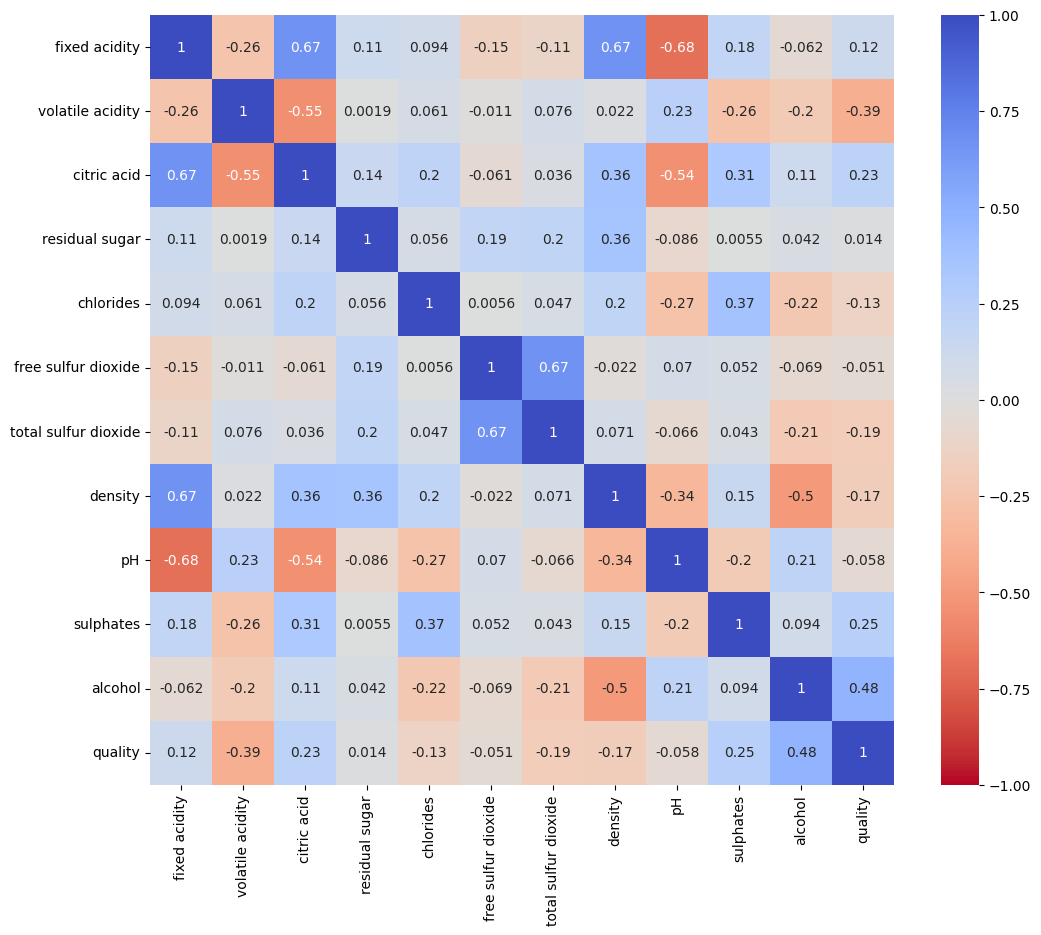

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True, 
            vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [54]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [55]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [56]:
features = pd.DataFrame(data=np.c_[X.columns,
                                   rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [57]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


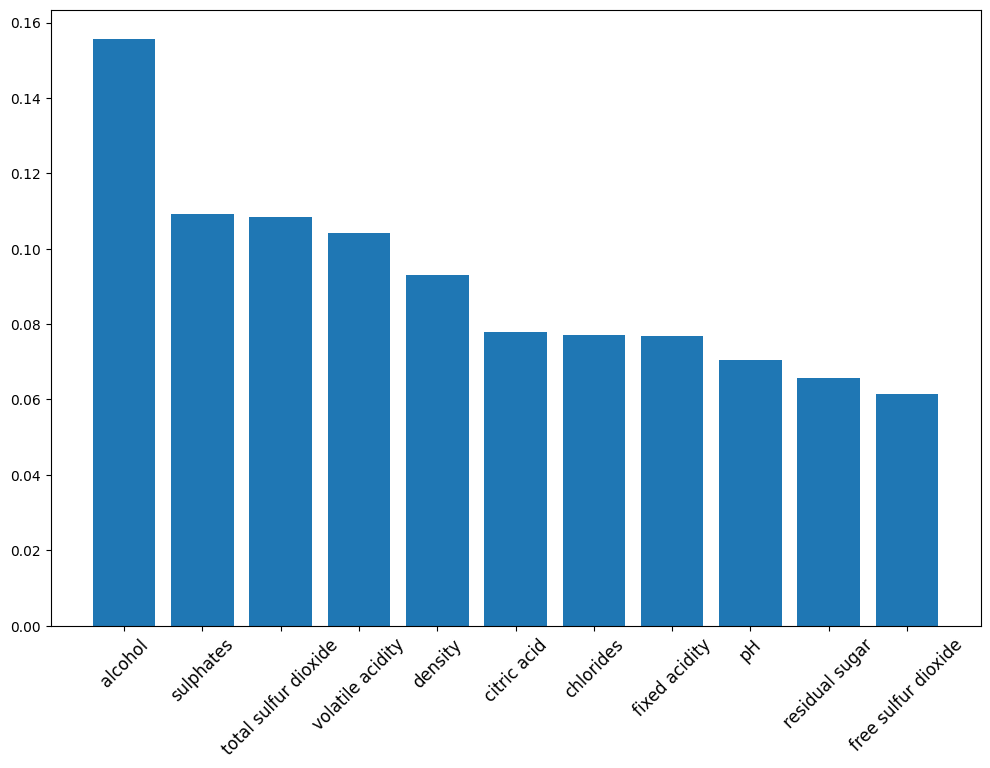

In [58]:
plt.figure(figsize=(12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

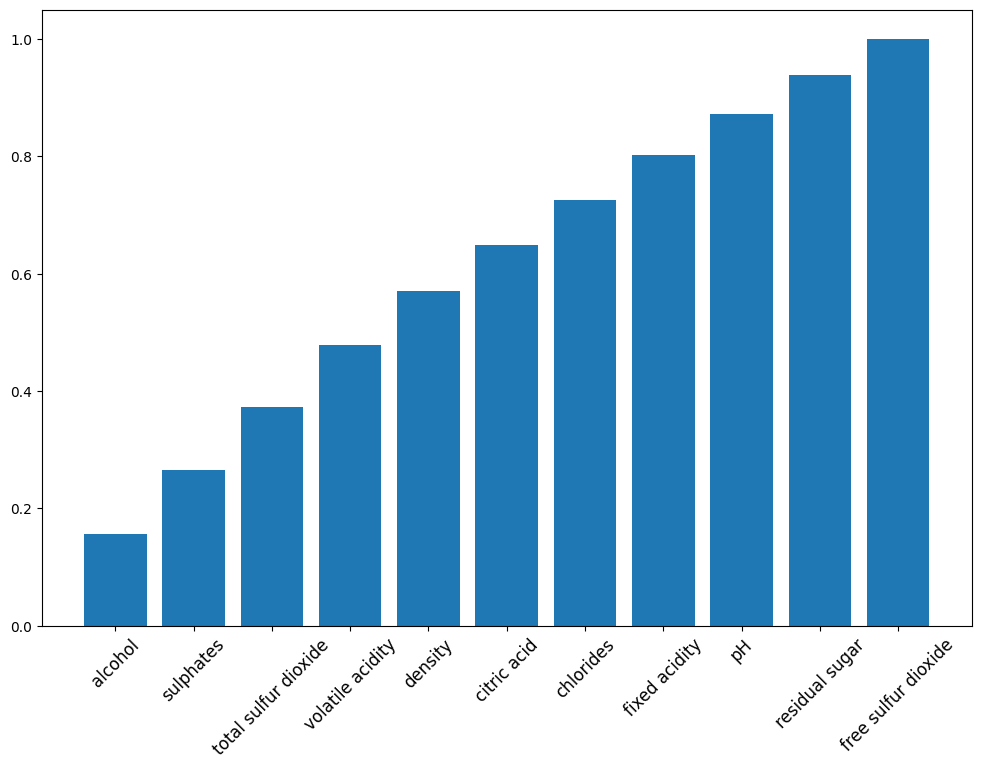

In [59]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [61]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [62]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, 
                                       rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [63]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
4,density,0.093134,False
5,citric acid,0.078026,False
6,chlorides,0.077069,False
7,fixed acidity,0.076794,False
8,pH,0.070383,True
9,residual sugar,0.065735,False


In [64]:
import pickle
with open("rfe.model", "wb") as f:
    pickle.dump(rfe_model, f)

In [65]:
import pickle
with open("rfe.model", "rb") as f:
    rfe_model = pickle.load(f)

In [66]:
rfe_model.predict(test_X[:10])

array([5, 6, 8, 6, 6, 6, 6, 5, 5, 6], dtype=int64)

In [67]:
test_y[:10].values

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5], dtype=int64)

# 회귀모형의 변수 선택

In [68]:
import statsmodels.api as sm
boston = sm.datasets.get_rdataset("Boston", package="MASS")
X = boston.data.iloc[:, :-1]
y = boston.data.iloc[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [71]:
X.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [72]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[X.columns, lr.coef_],
                        columns = ['feature', 'coef'])

In [73]:
features.coef

0     -7.245609
1      6.078411
2        1.6142
3       2.43956
4    -10.434403
5     14.591353
6      0.336012
7    -16.674294
8       7.07346
9     -5.910729
10    -9.451384
11     2.558014
12   -20.614564
Name: coef, dtype: object

In [74]:
features["coef"] = features.coef.astype(float)

In [75]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
5,rm,14.591353
8,rad,7.073460
1,zn,6.078411
11,black,2.558014
3,chas,2.439560
2,indus,1.614200
6,age,0.336012
9,tax,-5.910729
0,crim,-7.245609
10,ptratio,-9.451384


# SelectKBest

In [76]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [77]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [78]:
X_new[:5]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

In [79]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [80]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [81]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

In [82]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  